### pyspark kernel

In [2]:
from platform import python_version
print(python_version())

3.7.9


In [3]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import pytz

import os

In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
#bucket = 'gs://' + 'msca-bdp-students-bucket' + '/shared_data/rohits/university_tweets/'

#print(bucket)

## Read Data with Pickle Files

In [4]:
yale = pd.read_pickle('/kaggle/input/university-tweets/yale_tweets.pkl')
uchicago = pd.read_pickle('/kaggle/input/university-tweets/uchicago_tweets.pkl')
northwestern = pd.read_pickle('/kaggle/input/university-tweets/northwestern_tweets.pkl')
mit = pd.read_pickle('/kaggle/input/university-tweets/mit_tweets.pkl')

In [5]:
for df in [yale, uchicago, northwestern, mit]:
    print(df.shape)

(876232, 23)
(690055, 23)
(500000, 23)
(861709, 23)


Save pickle files of each university dataframe, with converted date columns and remove unnecessary columns (hashtags, coordinates, url).

In [ ]:
for string, df in [('uchicago', uchicago), ('mit', mit), ('northwestern', northwestern), ('yale', yale)]:
    df['tweet_created_at'] = pd.to_datetime(df['tweet_created_at']).dt.tz_convert(tz='US/Central')
    df['user_created_at'] = pd.to_datetime(df['user_created_at']).dt.tz_convert(tz='US/Central')
    df.to_pickle(bucket + string + '_tweets.pkl', protocol = 4)
    print(f"wrote {string} pickle file!")
    # df.to_csv(bucket + string + '_tweets.csv', index=False)
    # print(f"wrote {string} CSV!")

In [6]:
university_tweets = pd.concat([uchicago, mit, northwestern, yale],
                              ignore_index=False,
                              keys= ['UChicago', 'MIT', 'Northwestern', 'Yale'],
                              names = ['University', None])

Confirm datatypes are correct.

In [7]:
university_tweets.dtypes

tweet_created_at             datetime64[ns, US/Central]
tweet_id                                         object
in_reply_to_status_id_str                        object
in_reply_to_user_id_str                          object
university                                       object
retweet_count                                     int64
favorite_count                                    int64
original_tweet_id                                object
original_tweet_text                              object
text                                             object
user_created_at              datetime64[ns, US/Central]
user_id                                          object
description                                      object
favourites_count                                  int64
followers_count                                   int64
friends_count                                     int64
geo_enabled                                        bool
location                                        

In [8]:
university_tweets.shape

(2927996, 23)

In [9]:
university_tweets.columns

Index(['tweet_created_at', 'tweet_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id_str', 'university', 'retweet_count',
       'favorite_count', 'original_tweet_id', 'original_tweet_text', 'text',
       'user_created_at', 'user_id', 'description', 'favourites_count',
       'followers_count', 'friends_count', 'geo_enabled', 'location',
       'user_display_name', 'statuses_count', 'protected', 'user_url',
       'verified'],
      dtype='object')

In [10]:
university_tweets.head()

tweet_created_at            tweet_id  \
University                                                   
UChicago   0 2017-06-22 18:28:13-05:00  878031903995113472   
           1 2017-06-22 18:33:37-05:00  878033262437834752   
           2 2017-06-22 18:35:29-05:00  878033732753432576   
           3 2017-06-22 18:36:01-05:00  878033865981521920   
           4 2017-06-22 18:42:33-05:00  878035512405114880   

             in_reply_to_status_id_str in_reply_to_user_id_str university  \
University                                                                  
UChicago   0                      None                    None   UChicago   
           1                      None                    None   UChicago   
           2                      None                    None   UChicago   
           3                      None                    None   UChicago   
           4                      None                    None   UChicago   

              retweet_count  favorite_count   original_tweet_id  \
University                                                        
UChicago   0              0               0                None   
           1              0               0                None   
           2              0               0                None   
           3              0               0  877956509791027201   
           4              0               0                None   

                                            original_tweet_text  \
University                                                        
UChicago   0                                               None   
           1                                               None   
           2                                               None   
           3  We congratulate @UChicago &amp; Pres R. Zimmer...   
           4                                               None   

                                                           text  ...  \
University                                                       ...   
UChicago   0  Non-UChicago people ignore this tweet...\nTHE ...  ...   
           1  the four uchicago dress senses: business casua...  ...   
           2  Professor Bruce Cumings @bruce4korea from Univ...  ...   
           3  RT @HdxAcademy: We congratulate @UChicago &amp...  ...   
           4  Great visit from @UChicago students #PaulSeren...  ...   

             favourites_count followers_count friends_count  geo_enabled  \
University                                                                 
UChicago   0            10430             420           390        False   
           1             4158             103           152         True   
           2              196            1283           690         True   
           3              225              33           463        False   
           4              156             293           243        False   

                        location     user_display_name  statuses_count  \
University                                                               
UChicago   0                None          Mikala Paula            5739   
           1  hyde park, chicago        @body_negative             558   
           2  Seoul, South Korea  tbs eFM This Morning            6150   
           3       United States   Elizabeth Marquardt             101   
           4         Bozeman, MT    MuseumoftheRockies             120   

             protected                                           user_url  \
University                                                                  
UChicago   0     False                                               None   
           1     False              https://www.twitter.com/body_negative   
           2     False  http://tbs.seoul.kr/cont/eFM/ThisMorning/intro...   
           3     False                     http://elizabethmarquardt.blog   
           4     False                  http://www.museumoftherockies.org   

          

In [ ]:
# parse date string with to_datetime and convert from UTC to Central Time
%time university_tweets['tweet_created_at'] = pd.to_datetime(university_tweets['tweet_created_at']).dt.tz_convert(tz='US/Central')

In [ ]:
# parse date string with to_datetime and convert from UTC to Central Time
%time university_tweets['user_created_at'] = pd.to_datetime(university_tweets['user_created_at']).dt.tz_convert(tz='US/Central')

## Basic Data Exploration

Check column coverage for null values.

In [12]:
tweet_cols = ['tweet_created_at', 'tweet_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'university',
       'retweet_count', 'favorite_count', 'original_tweet_id',
       'original_tweet_text', 'text']

In [13]:
# percentage of null values in each column (includes None or NaN in object arrays, NaN in numeric arrays)
university_tweets[tweet_cols].isnull().sum() / len(university_tweets[tweet_cols])

tweet_created_at             0.000000
tweet_id                     0.000000
in_reply_to_status_id_str    0.895940
in_reply_to_user_id_str      0.884030
university                   0.000000
retweet_count                0.000000
favorite_count               0.000000
original_tweet_id            0.323248
original_tweet_text          0.323248
text                         0.000000
dtype: float64

Pretty much none of the tweets include a value in the coordinates column. Approximately 90% of the tweets are *not* in reply to others, and 30% are retweets (since original_tweet_id is the id_str value taken from the retweeted_status embedded JSON object). 

In [14]:
university_tweets[['retweet_count', 'favorite_count']].agg('max')

retweet_count     0
favorite_count    0
dtype: int64

None of the tweets we have identified were very popular...they were not retweeted or favorited (liked) by other users.

In [15]:
university_tweets.groupby("University").size().sort_values(ascending=False)

University
Yale            876232
MIT             861709
UChicago        690055
Northwestern    500000
dtype: int64

Yale has the most tweets. Northwestern has the fewest.

In [16]:
unique_users = university_tweets.groupby("University")['user_id'].agg(num_unique_users='nunique', num_total_users='count')

unique_users['pct_coverage'] = round(100 * (unique_users['num_unique_users'] / unique_users['num_total_users']), 2)

In [17]:
unique_users.sort_values('pct_coverage', ascending = False)

,num_unique_users,num_total_users,pct_coverage
University,,,
Yale,579700,876232,66.16
Northwestern,290438,500000,58.09
UChicago,358392,690055,51.94
MIT,417536,861709,48.45


Total number of unique users in the dataset.

In [18]:
unique_users['num_unique_users'].sum()

1646066

Unsurprisingly, the ranking of universities that we observed with respect to the number of tweets is preservered with respect to the number of unique users 
posting the tweets. However, the percentage of unique users to total number of tweets is slightly more informative. Yale still leads, but Northwestern, which has the fewest number of tweets overall, has nearly 60% of unique profiles behind those tweets.

## User Analysis

In [19]:
users = university_tweets.loc[:,
                      ['tweet_created_at','tweet_id','in_reply_to_status_id_str', 'original_tweet_id',
                       'user_created_at', 'user_id', 'description', 'university', 'favourites_count',
                       'followers_count', 'friends_count', 'geo_enabled', 'location',
                       'user_display_name', 'statuses_count', 'protected', 'user_url','verified']]

users.shape

(2927996, 18)

The dimensions are the same as the tweets, as expected, because each row is still a unique *Tweet*, we've only just isolated the columns that contain metadata about the user who *posted* the Tweet.

In [20]:
users.head()

tweet_created_at            tweet_id  \
University                                                   
UChicago   0 2017-06-22 18:28:13-05:00  878031903995113472   
           1 2017-06-22 18:33:37-05:00  878033262437834752   
           2 2017-06-22 18:35:29-05:00  878033732753432576   
           3 2017-06-22 18:36:01-05:00  878033865981521920   
           4 2017-06-22 18:42:33-05:00  878035512405114880   

             in_reply_to_status_id_str   original_tweet_id  \
University                                                   
UChicago   0                      None                None   
           1                      None                None   
           2                      None                None   
           3                      None  877956509791027201   
           4                      None                None   

                       user_created_at             user_id  \
University                                                   
UChicago   0 2016-04-10 16:22:34-05:00  719274394816610304   
           1 2016-05-30 02:00:16-05:00  737176785239048193   
           2 2010-01-10 19:33:53-06:00           103719930   
           3 2017-01-01 11:53:34-06:00  815616970938863616   
           4 2017-05-30 10:03:03-05:00  869569854138798080   

                                                    description university  \
University                                                                   
UChicago   0                           Also a really good cook.   UChicago   
           1                            dana 👀 personal account   UChicago   
           2  Latest news from Korea and the world. Weekdays...   UChicago   
           3  Author, blogger, mother, seeker. http://elizab...   UChicago   
           4  Welcome to the Paleo-Lab at the Museum of the ...   UChicago   

              favourites_count  followers_count  friends_count  geo_enabled  \
University                                                                    
UChicago   0             10430              420            390        False   
           1              4158              103            152         True   
           2               196             1283            690         True   
           3               225               33            463        False   
           4               156              293            243        False   

                        location     user_display_name  statuses_count  \
University                                                               
UChicago   0                None          Mikala Paula            5739   
           1  hyde park, chicago        @body_negative             558   
           2  Seoul, South Korea  tbs eFM This Morning            6150   
           3       United States   Elizabeth Marquardt             101   
           4         Bozeman, MT    MuseumoftheRockies             120   

              protected                                           user_url  \
University                                                                   
UChicago   0      False                                               None   
           1      False              https://www.twitter.com/body_negative   
           2      False  http://tbs.seoul.kr/cont/eFM/ThisMorning/intro...   
           3      False                     http://elizabethmarquardt.blog   
           4      False                  http://www.museumoftherockies.org   

              verified  
University              
UChicago   0     False  
           1     False  
           2     False  
           3     False  
           4     False

In [21]:
users.tail()

tweet_created_at             tweet_id  \
University                                                         
Yale       876227 2019-11-16 07:14:38-06:00  1195691648451325954   
           876228 2019-05-17 12:14:51-05:00  1129435123038994433   
           876229 2019-05-17 12:14:54-05:00  1129435135856791555   
           876230 2019-02-06 20:14:51-06:00  1093332229760184321   
           876231 2020-08-18 02:14:47-05:00  1295620141057740801   

                  in_reply_to_status_id_str    original_tweet_id  \
University                                                         
Yale       876227                      None                 None   
           876228                      None  1129361383223644160   
           876229                      None  1129361383223644160   
           876230                      None  1092841883468845056   
           876231                      None  1295433979756191744   

                            user_created_at              user_id  \
University                                                         
Yale       876227 2009-10-21 05:01:59-05:00             84045279   
           876228 2009-09-22 10:52:21-05:00             76367277   
           876229 2018-06-21 15:01:08-05:00  1009888970413445120   
           876230 2018-09-10 20:18:27-05:00  1039322244063916032   
           876231 2018-09-13 10:58:50-05:00  1040268577490788360   

                                                         description  \
University                                                             
Yale       876227  plowing the fields of social business, contemp...   
           876228  I'm a Florida-based writer, blogger, author, p...   
           876229  Love Canada, trying to stay positive, Trudeau ...   
           876230                                               None   
           876231  God is the greatest🙌🙇\nA king forever👑\nA Lion...   

                  university  favourites_count  followers_count  \
University                                                        
Yale       876227       Yale            116100             1606   
           876228       Yale              6678              211   
           876229       Yale             10765              156   
           876230       Yale             32853              733   
           876231       Yale             84527             3347   

                   friends_count  geo_enabled        location  \
University                                                      
Yale       876227           4998        False            None   
           876228            477         True  Vero Beach, FL   
           876229            222        False            None   
           876230            860        False            None   
           876231           3840        False            None   

                            user_display_name  statuses_count  protected  \
University                                                                 
Yale       876227             zylvia auerbach          165367      False   
           876228            Michael Bielecki            3094      False   
           876229                   meem gurl            3979      False   
           876230            Libby Freeman⭐⭐⭐            8228      False   
           876231  KINGJEZZY👑 dè blueflame☄️🔥           72810      False   

                                    user_url  verified  
University                                              
Yale       876227  http://www.kann-verlag.de     False  
           876228                       None     False  
           876229                       None     False  
           876230                       None     False  
           876231                       None     False

### Original vs Retweet vs Reply

**Create binary flags for original, retweets, replies**

In [22]:
# tweets with both original and reply id not null?
users[(users['original_tweet_id'].notnull()) & (users['in_reply_to_status_id_str'].notnull())]

,,tweet_created_at,tweet_id,in_reply_to_status_id_str,original_tweet_id,user_created_at,user_id,description,university,favourites_count,followers_count,friends_count,geo_enabled,location,user_display_name,statuses_count,protected,user_url,verified
University,,,,,,,,,,,,,,,,,,,


None.

In [23]:
# neither retweet nor reply
originals = (users['original_tweet_id'].isnull()) & (users['in_reply_to_status_id_str'].isnull())

# replies
replies = users['in_reply_to_status_id_str'].notnull()

# retweets
retweets = users['original_tweet_id'].notnull()

In [24]:
users['original'] = np.where(originals, 1, 0)
users['reply'] = np.where(replies, 1, 0)
users['retweet'] = np.where(retweets, 1, 0)

Confirm flags worked.

In [25]:
users.loc[:, ['tweet_id', 'in_reply_to_status_id_str', 'original_tweet_id', 'original', 'reply', 'retweet']]

tweet_id in_reply_to_status_id_str  \
University                                                         
UChicago   0        878031903995113472                      None   
           1        878033262437834752                      None   
           2        878033732753432576                      None   
           3        878033865981521920                      None   
           4        878035512405114880                      None   
...                                ...                       ...   
Yale       876227  1195691648451325954                      None   
           876228  1129435123038994433                      None   
           876229  1129435135856791555                      None   
           876230  1093332229760184321                      None   
           876231  1295620141057740801                      None   

                     original_tweet_id  original  reply  retweet  
University                                                        
UChicago   0                      None         1      0        0  
           1                      None         1      0        0  
           2                      None         1      0        0  
           3        877956509791027201         0      0        1  
           4                      None         1      0        0  
...                                ...       ...    ...      ...  
Yale       876227                 None         1      0        0  
           876228  1129361383223644160         0      0        1  
           876229  1129361383223644160         0      0        1  
           876230  1092841883468845056         0      0        1  
           876231  1295433979756191744         0      0        1  

[2927996 rows x 6 columns]

Confirm replies flag worked.

In [26]:
users.loc[users['reply'] == 1, ['tweet_id', 'in_reply_to_status_id_str', 'original_tweet_id', 'original', 'reply', 'retweet']]

tweet_id in_reply_to_status_id_str  \
University                                                         
UChicago   8        878039761994227712        878025024694661120   
           13       878051196203913217        877930259538038784   
           17       878055021903880192        878046085578711040   
           20       891367567138410496        891272192729722880   
           21       891368507077795840        891358826179547136   
...                                ...                       ...   
Yale       876198  1227793104880721923       1227707427086327809   
           876199  1252767656106577920       1252767459397926912   
           876202   898986556781973504        898984625103486976   
           876221  1243345716103098368       1243225875342131204   
           876224  1275417034646532101       1275411872045547523   

                  original_tweet_id  original  reply  retweet  
University                                                     
UChicago   8                   None         0      1        0  
           13                  None         0      1        0  
           17                  None         0      1        0  
           20                  None         0      1        0  
           21                  None         0      1        0  
...                             ...       ...    ...      ...  
Yale       876198              None         0      1        0  
           876199              None         0      1        0  
           876202              None         0      1        0  
           876221              None         0      1        0  
           876224              None         0      1        0  

[304687 rows x 6 columns]

 ### Aggregations based on content creation. Weight according to original tweet, retweet and reply

In [27]:
users['total_university_tweets'] = users.groupby(["University", "user_id"])['tweet_id'].transform('count')

users['num_originals'] = users.groupby(["University", "user_id"])['original'].transform('sum')

users['num_replies'] = users.groupby(["University", "user_id"])['reply'].transform('sum')

users['num_retweets'] = users.groupby(["University", "user_id"])['retweet'].transform('sum')

In [28]:
users_summary = users.loc[:, ['tweet_id', 'tweet_created_at', 'user_id', 'user_display_name', 'location', 'university', 'user_created_at', 'verified', 'followers_count', 'total_university_tweets', 'statuses_count', 'num_originals', 'num_replies', 'num_retweets']]

In [32]:
users_summary['weighted_score'] = round(((users_summary['num_originals'] + 0.9*users_summary['num_replies'] + 0.75*users_summary['num_retweets']) / users_summary['total_university_tweets']), 2)
users_summary['pct_university_tweet'] = round(100 * users_summary['total_university_tweets'] / users_summary['total_tweets'])

In [ ]:
users_summary.columns = ['tweet_id', 'tweet_created_at', 'user_id', 'user_display_name', 'location', 'university', 'user_created_at', 'verified', 'followers_count', 'total_university_tweets', 'total_tweets', 'num_originals', 'num_replies', 'num_retweets', 'weighted_score', 'pct_university_tweet']

users_summary.reset_index(level=1, drop=True, inplace=True)

In [34]:
users_summary.head(10)

,tweet_id,tweet_created_at,user_id,user_display_name,location,university,user_created_at,verified,followers_count,total_university_tweets,total_tweets,num_originals,num_replies,num_retweets,weighted_score,pct_university_tweet
University,,,,,,,,,,,,,,,,
UChicago,878031903995113472,2017-06-22 18:28:13-05:00,719274394816610304,Mikala Paula,None,UChicago,2016-04-10 16:22:34-05:00,False,420,14,5739,7,4,3,0.92,0.0
UChicago,878033262437834752,2017-06-22 18:33:37-05:00,737176785239048193,@body_negative,"hyde park, chicago",UChicago,2016-05-30 02:00:16-05:00,False,103,16,558,9,3,4,0.92,3.0
UChicago,878033732753432576,2017-06-22 18:35:29-05:00,103719930,tbs eFM This Morning,"Seoul, South Korea",UChicago,2010-01-10 19:33:53-06:00,False,1283,3,6150,3,0,0,1.00,0.0
UChicago,878033865981521920,2017-06-22 18:36:01-05:00,815616970938863616,Elizabeth Marquardt,United States,UChicago,2017-01-01 11:53:34-06:00,False,33,1,101,0,0,1,0.75,1.0
UChicago,878035512405114880,2017-06-22 18:42:33-05:00,869569854138798080,MuseumoftheRockies,"Bozeman, MT",UChicago,2017-05-30 10:03:03-05:00,False,293,2,120,1,0,1,0.88,2.0
UChicago,878035797345054722,2017-06-22 18:43:41-05:00,186637685,Harriett Buhai Cntr,Los Angeles,UChicago,2010-09-03 19:15:53-05:00,False,454,2,773,2,0,0,1.00,0.0
UChicago,878036950170468352,2017-06-22 18:48:16-05:00,3162434887,らえらぷす/ジュラルC,ブルースター首都ユニオン,UChicago,2015-04-18 07:09:49-05:00,False,875,7,107954,0,0,7,0.75,0.0
UChicago,878038679796670464,2017-06-22 18:55:09-05:00,287999434,tbs eFM 101.3MHz,"Seoul, Korea",UChicago,2011-04-25 21:11:16-05:00,True,2304,2,3779,0,0,2,0.75,0.0
UChicago,878039761994227712,2017-06-22 18:59:27-05:00,175802915,ovo_cody,"New York, USA",UChicago,2010-08-07 12:19:53-05:00,False,379,1,30,0,1,0,0.90,3.0


In [35]:
users_summary.shape

(2927996, 16)

### Deduplicating Users

The issue here is that each record that we pulled down from Twitter represents a **unique Tweet**, which therefore means that we **likely have duplicate information** for users. This is because **any given user may have tweeted about a University more than once.** 
<br>
<br>
And, since the tweets from a given user might be hours, days, or weeks apart, certain metadata about that user will be different because that information gets updated frequently. For example, a user's statuses_count (number of Tweets) or followers_count could be different between two consecutive Tweets about their university.
<br>
<br>
To address this, **we will group by university and then by user_id**, and select the values for numerical metadata like statuses_count, friends_count, favourites_count, and followers_count that **correspond to the most recent tweet_created_at column.**

In [37]:
users_summary[(users_summary['user_display_name'] == 'Andrew Wyatt') & (users_summary['university'] == 'UChicago')].sort_values(by='tweet_created_at', ascending=False)

,tweet_id,tweet_created_at,user_id,user_display_name,location,university,user_created_at,verified,followers_count,total_university_tweets,total_tweets,num_originals,num_replies,num_retweets,weighted_score,pct_university_tweet
University,,,,,,,,,,,,,,,,
UChicago,1364268020454092804,2021-02-23 11:36:57-06:00,4864639100,Andrew Wyatt,None,UChicago,2016-02-05 08:06:19-06:00,False,156,15,1,1,14,0,0.91,1500.0
UChicago,1359690406506749952,2021-02-10 20:27:09-06:00,4864639100,Andrew Wyatt,None,UChicago,2016-02-05 08:06:19-06:00,False,156,15,5,1,14,0,0.91,300.0
UChicago,1358919464155234337,2021-02-08 17:23:42-06:00,4864639100,Andrew Wyatt,None,UChicago,2016-02-05 08:06:19-06:00,False,155,15,1,1,14,0,0.91,1500.0
UChicago,1354134070775656450,2021-01-26 12:28:15-06:00,4864639100,Andrew Wyatt,None,UChicago,2016-02-05 08:06:19-06:00,False,155,15,5,1,14,0,0.91,300.0
UChicago,1345825627581128705,2021-01-03 14:13:28-06:00,4864639100,Andrew Wyatt,None,UChicago,2016-02-05 08:06:19-06:00,False,153,15,2,1,14,0,0.91,750.0
UChicago,1344728648595742721,2020-12-31 13:34:28-06:00,4864639100,Andrew Wyatt,None,UChicago,2016-02-05 08:06:19-06:00,False,154,15,5,1,14,0,0.91,300.0
UChicago,1336374564465635328,2020-12-08 12:18:19-06:00,4864639100,Andrew Wyatt,None,UChicago,2016-02-05 08:06:19-06:00,False,152,15,1,1,14,0,0.91,1500.0
UChicago,1317629262711631878,2020-10-17 19:51:11-05:00,4864639100,Andrew Wyatt,None,UChicago,2016-02-05 08:06:19-06:00,False,154,15,3,1,14,0,0.91,500.0
UChicago,1194004037420699652,2019-11-11 15:28:40-06:00,4864639100,Andrew Wyatt,None,UChicago,2016-02-05 08:06:19-06:00,False,156,15,1,1,14,0,0.91,1500.0


I'm not sure what's going on with this user. Their university_tweets count stays constant, as we would expect, but total tweets is always much lower. Maybe they are deleting tweets?

In [38]:
users_summary[users_summary['total_university_tweets'] > users_summary['total_tweets']].shape

(16645, 16)

Looks like it's a relatively small % of records in which univeristy tweets total is greater than total tweets.

In [39]:
users_summary[(users_summary['user_display_name'] == 'Chris Wilkerson') & (users_summary['university'] == 'UChicago')].sort_values(by='tweet_created_at', ascending=False)

,tweet_id,tweet_created_at,user_id,user_display_name,location,university,user_created_at,verified,followers_count,total_university_tweets,total_tweets,num_originals,num_replies,num_retweets,weighted_score,pct_university_tweet
University,,,,,,,,,,,,,,,,
UChicago,1372197923266646016,2021-03-17 09:47:33-05:00,2669618089,Chris Wilkerson,"Chicago, IL",UChicago,2014-07-22 09:39:26-05:00,False,3817,356,1248,0,0,356,0.75,29.0
UChicago,1369454623036162051,2021-03-09 19:06:40-06:00,2669618089,Chris Wilkerson,"Chicago, IL",UChicago,2014-07-22 09:39:26-05:00,False,3672,356,1242,0,0,356,0.75,29.0
UChicago,1367651635401535492,2021-03-04 19:42:14-06:00,2669618089,Chris Wilkerson,"Chicago, IL",UChicago,2014-07-22 09:39:26-05:00,False,3596,356,1239,0,0,356,0.75,29.0
UChicago,1365340340480311302,2021-02-26 10:37:58-06:00,2669618089,Chris Wilkerson,"Chicago, IL",UChicago,2014-07-22 09:39:26-05:00,False,3565,356,1237,0,0,356,0.75,29.0
UChicago,1361002453823590406,2021-02-14 11:20:45-06:00,2669618089,Chris Wilkerson,"Chicago, IL",UChicago,2014-07-22 09:39:26-05:00,False,3408,356,1232,0,0,356,0.75,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UChicago,897775252876517377,2017-08-16 06:01:14-05:00,2669618089,Chris Wilkerson,"Chicago, IL",UChicago,2014-07-22 09:39:26-05:00,False,646,356,278,0,0,356,0.75,128.0
UChicago,893813365751074817,2017-08-05 07:38:07-05:00,2669618089,Chris Wilkerson,"Chicago, IL",UChicago,2014-07-22 09:39:26-05:00,False,630,356,274,0,0,356,0.75,130.0
UChicago,893813365751074817,2017-08-05 07:38:07-05:00,2669618089,Chris Wilkerson,"Chicago, IL",UChicago,2014-07-22 09:39:26-05:00,False,630,356,274,0,0,356,0.75,130.0


This is what it's supposed to look like -- university tweets stays constant, total tweets rises with recency.

In [40]:
users_sorted = users_summary.sort_values(['user_id','tweet_created_at'], ascending=False)

In [41]:
users_sorted.head()

,tweet_id,tweet_created_at,user_id,user_display_name,location,university,user_created_at,verified,followers_count,total_university_tweets,total_tweets,num_originals,num_replies,num_retweets,weighted_score,pct_university_tweet
University,,,,,,,,,,,,,,,,
Northwestern,1199419109425000448,2019-11-26 14:06:14-06:00,99999986,Calvin Christian,"Grandville, MI",Northwestern,2009-12-28 11:19:21-06:00,False,539,1,1675,1,0,0,1.00,0.0
MIT,1173486724787228672,2019-09-16 01:40:12-05:00,999999785804349440,桔梗,None,MIT,2018-05-25 08:05:02-05:00,False,117,1,1062,0,1,0,0.90,0.0
Northwestern,1068448434678464512,2018-11-30 04:15:32-06:00,999998677186887681,michael schulze,post falls idaho,Northwestern,2018-05-25 08:00:38-05:00,False,4,1,223,1,0,0,1.00,0.0
UChicago,1266119665908174850,2020-05-28 16:30:26-05:00,999998093381677056,Karra & Nehi,"Elizabeth City, NC",UChicago,2018-05-25 07:58:19-05:00,False,187,1,30532,0,0,1,0.75,0.0
Yale,1044935325435535360,2018-09-26 08:02:50-05:00,999998048251105280,Laraaa💙,Hogwarts,Yale,2018-05-25 07:58:08-05:00,False,35,1,4186,0,0,1,0.75,0.0


In [42]:
users_no_dupes = users_sorted.groupby(['University', 'user_id']).head(1)

In [43]:
users_no_dupes.shape

(1646066, 16)

We can see that the count of unique users (number of rows) matches that we found in our analysis above.

## Influential Users

### Most Popular Non-Verified Users (by Follower Count)

In [44]:
users_no_dupes.loc[users_no_dupes['verified'] == False, ['user_id', 'user_display_name', 'location', 'total_university_tweets', 'followers_count']].sort_values(by='followers_count', ascending=False).groupby('University').head(1)

,user_id,user_display_name,location,total_university_tweets,followers_count
University,,,,,
UChicago,149760844,Lost In History,None,2,5421929
Yale,149760844,Lost In History,None,1,5160146
Northwestern,73880716,Ece Temelkuran,In someone else’s shoes,2,2706379
MIT,73880716,Ece Temelkuran,"istanbul, mostly",3,2694556


High followers, but not many university tweets...

In [45]:
uchicago_users = users_no_dupes.loc["UChicago"]

uchicago_users.shape

(358392, 16)

In [46]:
uchicago_users.loc[uchicago_users['total_tweets'] > uchicago_users['total_university_tweets'],['tweet_created_at', 'user_display_name', 'location', 'total_university_tweets', 'total_tweets', 'pct_university_tweet']].nlargest(5, columns = 'total_university_tweets')

,tweet_created_at,user_display_name,location,total_university_tweets,total_tweets,pct_university_tweet
University,,,,,,
UChicago,2021-03-17 10:14:00-05:00,The University of Chicago,"Chicago, Illinois",3448,21760,16.0
UChicago,2021-03-17 09:11:23-05:00,UChicago GSU,"Chicago, IL 60637",3053,10425,29.0
UChicago,2021-03-15 15:44:57-05:00,UChicago Athletics,Chicago,3011,13695,22.0
UChicago,2021-03-04 18:04:46-06:00,Ruth Paget,Monterey County California,1599,48081,3.0
UChicago,2021-03-09 15:05:47-06:00,Lyo Louis-Jacques,"Chicago, Illinois",1166,18230,6.0


If we sort just by the number of university of tweets, we see the the top 3 are University related accounts. The second two are individual users, the latter of which is a lecturer/librarian at the UChicago Law School.

When we filter by users with at least 1000 folowers, and 25 university tweets, and then sort by the *percentage of tweets related to University* we get a different list. 

In [47]:
uchicago_users.loc[(uchicago_users['total_tweets'] > uchicago_users['total_university_tweets']) &
                   (uchicago_users['followers_count'] > 999) &
                   (uchicago_users['total_university_tweets'] > 25),
                   ['tweet_created_at', 'user_display_name', 'location', 'followers_count', 'total_university_tweets', 'total_tweets', 'pct_university_tweet']].nlargest(5, columns = ['pct_university_tweet' ])

,tweet_created_at,user_display_name,location,followers_count,total_university_tweets,total_tweets,pct_university_tweet
University,,,,,,,
UChicago,2021-03-14 10:47:36-05:00,Paul Staniland,"Chicago, IL",18522,412,452,91.0
UChicago,2021-03-01 10:00:02-06:00,UChicago Sociology,"Chicago, IL",1361,52,130,40.0
UChicago,2021-03-17 09:17:57-05:00,UChicagoCS,"Chicago, IL",1208,460,1221,38.0
UChicago,2018-11-29 13:07:28-06:00,V.TITOV,"Ukraine, Kiev",2028,68,192,35.0
UChicago,2021-02-21 18:06:17-06:00,(((Christine Fair))),The Capital of Jesus-e-Stan,42246,122,353,35.0


### User Location Analysis

In [48]:
def get_locations_df(users_df, university):
    """
    For a given university, filter the users df for profiles from that University.
    Find most common locations among those users (not including None).
    """
    uni_users = users_no_dupes.loc[university]
    
    most_common_locations = uni_users.groupby(['University', 'location'])[['user_id']].count().sort_values(by='user_id', ascending=False)
    most_common_locations.columns = ['num_users']
    most_common_locations.reset_index(level=1, inplace=True)
    
    return most_common_locations
    

In [49]:
def location_analysis(locations_df, city, university):
    """Compute number of unique locations,
    percentage of users in Uniersity city,
    and percentage of users with no location provided.
    """
    uni_users = users_no_dupes.loc[university]
    
    unique_locations = uni_users['location'].nunique()
    print(f"There are {unique_locations} unique locations among users who tweet about {university} (not including nulls).")
    
    pct_city = round((100* locations_df[locations_df['location'].str.contains(city, case=False)]['num_users'].sum() / uni_users.shape[0]))
    print(f"{pct_city}% of users who tweet about {university} listed {city} as their location.")
    
    pct_null = round((100* uni_users[uni_users['location'].isnull()].shape[0] / uni_users.shape[0]))
    print(f"{pct_null}% of users who tweet about {university} do not provide their location.")

In [50]:
get_locations_df(users_no_dupes, university = 'UChicago')

,location,num_users
University,,
UChicago,"Chicago, IL",12621
UChicago,United States,5740
UChicago,Chicago,3505
UChicago,"Washington, DC",2987
UChicago,"New York, NY",2469
...,...,...
UChicago,"Island of Misfit Toys , NYC",1
UChicago,Island of La Grande Jatte,1
UChicago,Island of Intuitive Anarchy,1


In [51]:
location_analysis(get_locations_df(users_no_dupes, university = 'UChicago'), 'Chicago', 'UChicago')

There are 83326 unique locations among users who tweet about UChicago (not including nulls).
6% of users who tweet about UChicago listed Chicago as their location.
31% of users who tweet about UChicago do not provide their location.


In [52]:
location_analysis(get_locations_df(users_no_dupes, university = 'Yale'), 'New Haven', 'Yale')

There are 131435 unique locations among users who tweet about Yale (not including nulls).
0% of users who tweet about Yale listed New Haven as their location.
33% of users who tweet about Yale do not provide their location.


In [53]:
get_locations_df(users_no_dupes, university = 'Yale')

,location,num_users
University,,
Yale,United States,11208
Yale,"Chicago, IL",3857
Yale,"California, USA",3768
Yale,USA,3612
Yale,India,3023
...,...,...
Yale,Jacksonille Florida,1
Yale,"Jackson/Oxford/Port Gibson,MS",1
Yale,"Jackson,ms",1


In [54]:
location_analysis(get_locations_df(users_no_dupes, university = 'MIT'), 'Cambridge', 'MIT')

There are 92185 unique locations among users who tweet about MIT (not including nulls).
1% of users who tweet about MIT listed Cambridge as their location.
30% of users who tweet about MIT do not provide their location.


In [55]:
location_analysis(get_locations_df(users_no_dupes, university = 'MIT'), 'Boston', 'MIT')

There are 92185 unique locations among users who tweet about MIT (not including nulls).
2% of users who tweet about MIT listed Boston as their location.
30% of users who tweet about MIT do not provide their location.


In [56]:
location_analysis(get_locations_df(users_no_dupes, university = 'Northwestern'), 'Evanston', 'Northwestern')

There are 70707 unique locations among users who tweet about Northwestern (not including nulls).
0% of users who tweet about Northwestern listed Evanston as their location.
31% of users who tweet about Northwestern do not provide their location.


In [57]:
location_analysis(get_locations_df(users_no_dupes, university = 'Northwestern'), 'Chicago', 'Northwestern')

There are 70707 unique locations among users who tweet about Northwestern (not including nulls).
3% of users who tweet about Northwestern listed Chicago as their location.
31% of users who tweet about Northwestern do not provide their location.


### Tweet Timeline Analysis

In [58]:
tweet_info = university_tweets.loc[:, ['tweet_created_at', 'tweet_id']]
tweet_info.shape

(2927996, 2)

In [59]:
tweet_info['date'] = tweet_info['tweet_created_at'].dt.date

tweet_info['month'] = tweet_info['tweet_created_at'].dt.month

tweet_info['year'] = tweet_info['tweet_created_at'].dt.year

tweet_info['month_year'] = tweet_info['tweet_created_at'].dt.to_period('M')

/opt/conda/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1104: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [60]:
tweet_info.dtypes

tweet_created_at    datetime64[ns, US/Central]
tweet_id                                object
date                                    object
month                                    int64
year                                     int64
month_year                           period[M]
dtype: object

In [61]:
tweet_info.head()

tweet_created_at            tweet_id        date  month  \
University                                                                      
UChicago   0 2017-06-22 18:28:13-05:00  878031903995113472  2017-06-22      6   
           1 2017-06-22 18:33:37-05:00  878033262437834752  2017-06-22      6   
           2 2017-06-22 18:35:29-05:00  878033732753432576  2017-06-22      6   
           3 2017-06-22 18:36:01-05:00  878033865981521920  2017-06-22      6   
           4 2017-06-22 18:42:33-05:00  878035512405114880  2017-06-22      6   

              year month_year  
University                     
UChicago   0  2017    2017-06  
           1  2017    2017-06  
           2  2017    2017-06  
           3  2017    2017-06  
           4  2017    2017-06

In [62]:
tweet_info.tail()

tweet_created_at             tweet_id        date  \
University                                                                     
Yale       876227 2019-11-16 07:14:38-06:00  1195691648451325954  2019-11-16   
           876228 2019-05-17 12:14:51-05:00  1129435123038994433  2019-05-17   
           876229 2019-05-17 12:14:54-05:00  1129435135856791555  2019-05-17   
           876230 2019-02-06 20:14:51-06:00  1093332229760184321  2019-02-06   
           876231 2020-08-18 02:14:47-05:00  1295620141057740801  2020-08-18   

                   month  year month_year  
University                                 
Yale       876227     11  2019    2019-11  
           876228      5  2019    2019-05  
           876229      5  2019    2019-05  
           876230      2  2019    2019-02  
           876231      8  2020    2020-08

In [63]:
tweets_by_date = tweet_info.groupby(['University', 'date']).agg({'tweet_id': 'count'})
tweets_by_date.columns = ['num_tweets']

tweets_by_date.reset_index(level=1, inplace=True)

In [64]:
tweets_by_date.loc['UChicago']

,date,num_tweets
University,,
UChicago,2017-06-22,228
UChicago,2017-06-23,202
UChicago,2017-06-24,159
UChicago,2017-06-25,257
UChicago,2017-06-26,256
...,...,...
UChicago,2021-03-13,239
UChicago,2021-03-14,207
UChicago,2021-03-15,392


In [65]:
tweets_by_date.loc['Yale']

,date,num_tweets
University,,
Yale,2017-06-22,222
Yale,2017-06-23,233
Yale,2017-06-24,416
Yale,2017-06-25,285
Yale,2017-06-26,204
...,...,...
Yale,2021-03-13,1187
Yale,2021-03-14,351
Yale,2021-03-15,289


In [66]:
tweets_by_date.loc['Northwestern']

,date,num_tweets
University,,
Northwestern,2017-06-22,323
Northwestern,2017-06-23,258
Northwestern,2017-06-24,308
Northwestern,2017-06-25,487
Northwestern,2017-06-26,305
...,...,...
Northwestern,2021-03-14,120
Northwestern,2021-03-15,269
Northwestern,2021-03-16,121


In [67]:
tweets_by_date.loc['MIT'].iloc[-30:]

,date,num_tweets
University,,
MIT,2021-02-16,599
MIT,2021-02-17,588
MIT,2021-02-18,554
MIT,2021-02-19,662
MIT,2021-02-20,394
MIT,2021-02-21,325
MIT,2021-02-22,400
MIT,2021-02-23,337
MIT,2021-02-24,480


We've collected data from 6/22/2017 to 3/18/2021, which represents 1364 days (or, 3 years and 9 months, roughly). However, it looks like we've missing 56 days worth (unclear which days exactly). 

<AxesSubplot:title={'center':'Daily Number of Tweets, June 2017- March 2021'}, xlabel='Date', ylabel='Number of Tweets'>

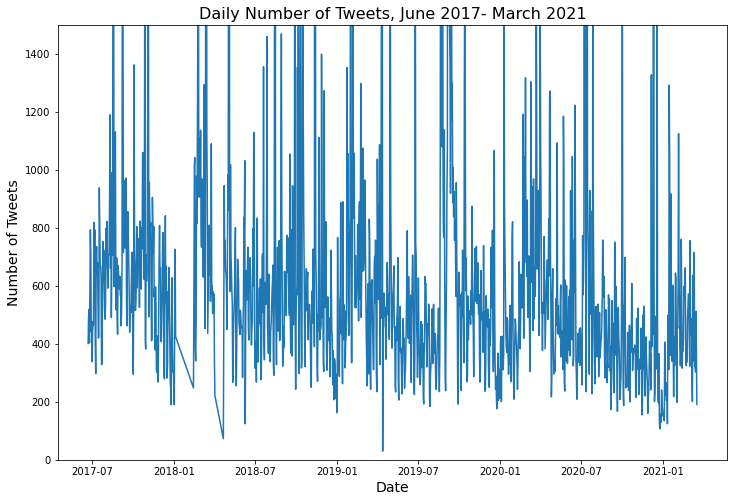

In [83]:
plt.figure(figsize=(12,8))
plt.title("Daily Number of Tweets, June 2017- March 2021", fontsize=16),
plt.xlabel("Date", fontsize=14),
plt.ylabel("Number of Tweets", fontsize=14)

# control x and y limits
plt.ylim(0,1500)

sns.lineplot(x='date', y='num_tweets', hue = tweets_by_date.index, data=tweets_by_date)

In [84]:
tweets_by_month = tweet_info.groupby(['University', 'year', 'month']).agg({'tweet_id': 'count'})
tweets_by_month.columns = ['num_tweets']

tweets_by_month.reset_index(level=[1, 2], inplace=True)

In [85]:
tweets_by_month.head()

,year,month,num_tweets
University,,,
UChicago,2017,6,2400
UChicago,2017,7,10541
UChicago,2017,8,12775
UChicago,2017,9,12778
UChicago,2017,10,25702


<Figure size 576x864 with 0 Axes>

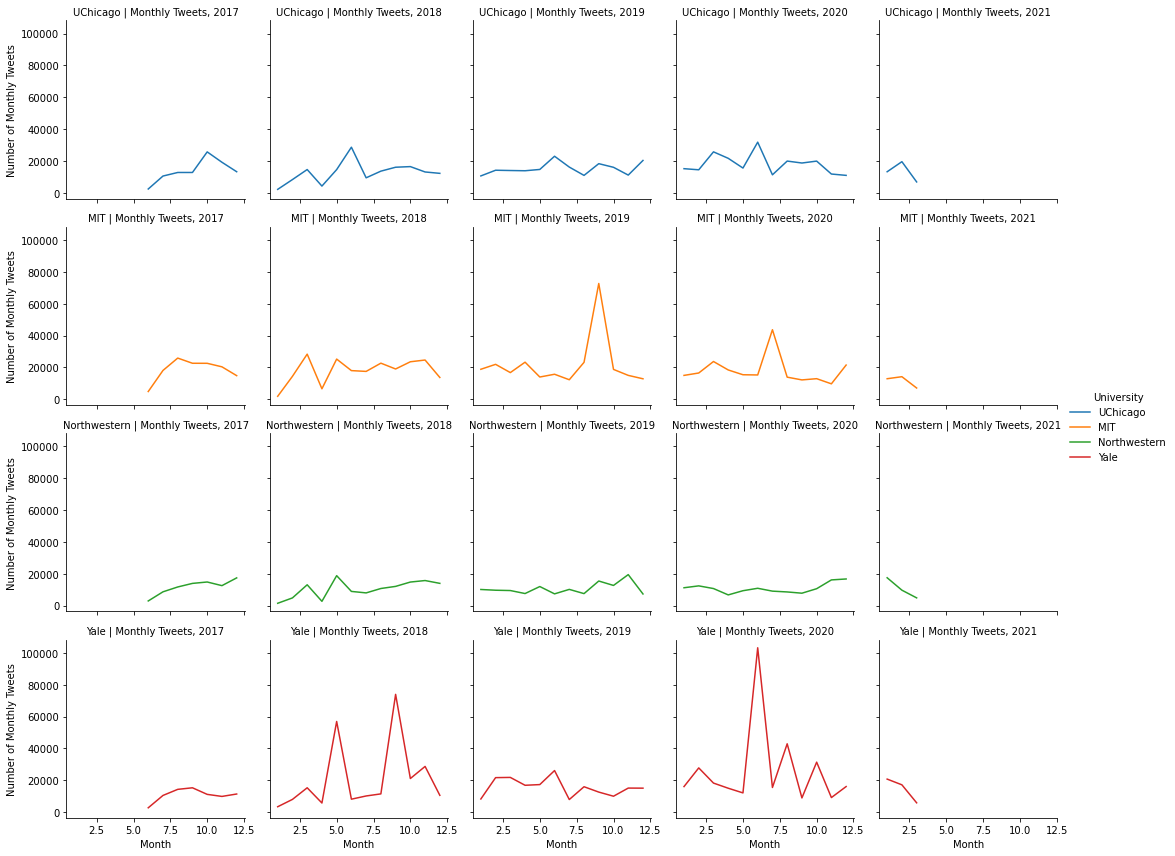

In [86]:
plt.figure(figsize=(8,12))
g = sns.FacetGrid(tweets_by_month.reset_index(level=0), col="year",  row='University', hue='University')
g.map(sns.lineplot, "month", "num_tweets")
g.set_titles(col_template="Monthly Tweets, {col_name}", row_template="{row_name}")
g.set_axis_labels("Month", "Number of Monthly Tweets")
g.add_legend()

In [87]:
tweets_by_date[tweets_by_date['num_tweets'] > 15000]

,date,num_tweets
University,,
MIT,2019-09-07,34957
MIT,2020-07-08,18286
Yale,2018-05-22,19659
Yale,2018-09-25,33542
Yale,2020-06-20,45226
Yale,2020-06-21,17470


<AxesSubplot:title={'center':'Monthly Count of Tweets, June 2017- March 2021'}, xlabel='Month', ylabel='Number of Tweets'>

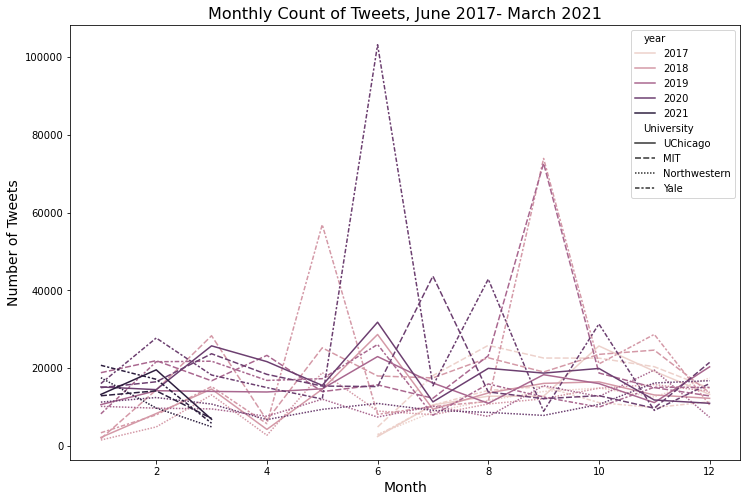

In [88]:
plt.figure(figsize=(12,8))
plt.title("Monthly Count of Tweets, June 2017- March 2021", fontsize=16),
plt.xlabel("Month", fontsize=14),
plt.ylabel("Number of Tweets", fontsize=14)

# control x and y limits
# plt.ylim(0, 2000)

sns.lineplot(x='month', y='num_tweets', hue='year',style=tweets_by_month.index, data=tweets_by_month)

In [ ]:
tweets_by_month_year = tweet_info.groupby(['University', 'month_year']).agg({'tweet_id': 'count'})
tweets_by_month_year.columns = ['num_tweets']

In [ ]:
tweets_by_month_year.reset_index(level=1, inplace=True)

In [ ]:
tweets_by_month_year.head()

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Monthly Count of Tweets, June 2017- March 2021", fontsize=16),
plt.xlabel("Month", fontsize=14),
plt.ylabel("Number of Tweets", fontsize=14)

# control x and y limits
# plt.ylim(0, 2000)

sns.lineplot(x='month_year', y='num_tweets', hue=tweets_by_month_year.index, data=tweets_by_month_year)

When it comes to user profiles, approximately **30% of the users do not include a location in their profile, and 68% do not include a link to another webpage. However, roughly 85% *do* include some text in the description field.**

Like we did with the columns describing unique Tweets, let's examine null value percentages for the unique user df.

In [ ]:
users_no_dupes.isnull().sum() / len(users_no_dupes)

In [ ]:
# group by day, count of tweets
# seaborn line plot

### Posts, Followers, Friends, Favorites

In [ ]:
user_means = users_no_dupes_new[['statuses_count', 'followers_count', 'friends_count','favourites_count']].mean(level='University').round()

user_means.columns = ['mean_statuses', 'mean_followers', 'mean_friends', 'mean_favorites']

user_means.sort_values(by='mean_statuses', ascending=False)

Users who tweet about Yale also tweet the most overall (regardess of topic, and including retweets) and favorite (like) tweets most often, on average. However, they have the fewest followers on average -- users who tweet about Northwestern have the most followers on average.
<br>
<br>
Users from MIT are a fairly distant fourth place in terms of average total number of posts, but are second place in terms of followers and first place in terms of friends (users they follow).

### Most Prolific

In [ ]:
for uni in ['UChicago', 'Yale', 'Northwestern', 'MIT']:
    print(users_no_dupes.loc[uni, ['total_tweets', 'followers_count', 'friends_count','favourites_count']].sort_values(by='statuses_count', ascending=False).head())

### "Verified" Users

In [ ]:
users_no_dupes_new.loc[:, ['protected']].value_counts(normalize=True)

None of the users in this data (at the time of their most recent post) have "protected" Tweets. In other words, their Tweets are public -- anyone can view and interact with them.

In [82]:
users_no_dupes['verified'].value_counts()

False    1616419
True       29647
Name: verified, dtype: int64

Only 1% of the users have "verified" status from Twitter (which designates an account of note, from institutions like governmental, political offices, and news organizations, as well as athletes, and other celebrities). Let's see if we can inspect these, since verified users are influential and may be of use to the University.

**Top "Verified" Users by Follower Count**

In [77]:
verified_users = users_no_dupes[users_no_dupes['verified'] == True][['user_display_name', 'user_created_at', 'location', 'total_tweets', 'followers_count']]

In [78]:
verified_users.sort_values(by='followers_count', ascending=False).iloc[:20, ]

,user_display_name,user_created_at,location,total_tweets,followers_count
University,,,,,
Yale,CNN Breaking News,2007-01-01 19:48:14-06:00,Everywhere,74267,60670696
Northwestern,CNN Breaking News,2007-01-01 19:48:14-06:00,Everywhere,64141,54523396
MIT,CNN,2007-02-08 18:35:02-06:00,None,334355,53032251
Yale,CNN,2007-02-08 18:35:02-06:00,None,332110,52536592
Northwestern,CNN,2007-02-08 18:35:02-06:00,None,327589,51453676
Yale,The New York Times,2007-03-02 14:41:42-06:00,New York City,421248,49166257
Northwestern,The New York Times,2007-03-02 14:41:42-06:00,New York City,419346,48856180
MIT,Bill Gates,2009-06-24 13:44:10-05:00,"Seattle, WA",3107,47477760
UChicago,The New York Times,2007-03-02 14:41:42-06:00,New York City,403247,47064629


**Lot** of news organizations among the top 20: CNN, CNN Breaking News, New York Times, Fox News, Reuters, The Economist, BBC News
<br>
<br>
And, lots of overlap: The New York Times appears four times (out of a possible four), meaning that there are Tweets in our full dataset that were designated as related to one of the universities, based on keyword search.

How many Tweets in the full are from news-related accounts?

In [79]:
news_orgs = ['CNN', 'The New York Times', 'Forbes', 'The Associated Press', 'Reuters', 'The Economist', 'The Washington Post', 'The Wall Street Journal', 'The Chicago Tribune']

users[(users['user_display_name'].isin(news_orgs)) | (users['user_display_name'].str.contains(' News'))]['user_display_name'].value_counts().sum()

15550

Over 15,000 Tweets are from news organizations, and that's with a large, but not totally exhaustive list. This won't be very helpful to UChicago from the perspective of social media outreach, since news organizations are required to be independent, not promotional. Let's try to remove these from our consideration of verified users with some rough filtering.

In [80]:
verified_non_news = (~verified_users['user_display_name'].str.contains(" News")) & (~verified_users['user_display_name'].isin(news_orgs))

In [81]:
verified_users[verified_non_news].sort_values(by='followers_count', ascending=False).iloc[:20, ]

,user_display_name,user_created_at,location,total_tweets,followers_count
University,,,,,
MIT,Bill Gates,2009-06-24 13:44:10-05:00,"Seattle, WA",3107,47477760
MIT,Elon Musk,2009-06-02 15:12:29-05:00,None,12442,39054627
Northwestern,NASA,2007-12-19 14:20:32-06:00,None,60090,36349333
Northwestern,SportsCenter,2009-03-24 10:28:02-05:00,None,105701,35422803
Northwestern,National Geographic,2008-11-18 15:28:10-06:00,Global,53266,23650418
MIT,FC Barcelona,2009-12-15 03:53:50-06:00,Barcelona,88259,22205599
UChicago,Rahul Gandhi,2015-04-25 01:39:15-05:00,"12, Tughlak Lane, New Delhi",5222,17419559
Northwestern,TIME,2008-04-03 08:54:30-05:00,None,340455,16657658
Yale,TIME,2008-04-03 08:54:30-05:00,None,313627,15871838


Not much better...even with a *fairly* exhaustive list of news organizations and the pattern match, it's clear that even the remaining top verified accounts in our data are mostly from media institutions: NDTV, National Geographic, TIME, SportsCenter (ESPN). And a few billionaires mixed in (Bill Gates, Elon Musk).

### Top 10 Accounts By School, By Total Tweet Volume (Including ReTweets)

In [74]:
users_no_dupes.loc['UChicago', ['user_display_name', 'location', 'total_tweets']].nlargest(n=10, columns='total_tweets')

,user_display_name,location,total_tweets
University,,,
UChicago,noticias venezuela,venezuela,7960131
UChicago,Urban Dictionary,free and open internet,5140444
UChicago,News Service,cryptowatchbot@gmail.com,3856725
UChicago,PulpNews Crime,USA,3695415
UChicago,OccuWorld 🏴,Earth,3645251
UChicago,Noticias en tiempo real,"Montero, Bolivia",3534718
UChicago,AIBigDataCloudIoTBot,"San Francisco, CA",3231413
UChicago,Rojname Kurdish News ☀️,"Kurdistan, Europe",2920377
UChicago,アンジェラス🇯🇵🇭🇰🇹🇼🇻🇳🇺🇸,大阪府寝屋川市,2788116


In [72]:
users_no_dupes.loc['Yale', ['user_display_name', 'location', 'total_tweets']].nlargest(n=10, columns='total_tweets')

,user_display_name,location,total_tweets
University,,,
Yale,noticias venezuela,venezuela,9437137
Yale,PulpNews Crime,USA,3762527
Yale,News Service,cryptowatchbot@gmail.com,3627144
Yale,OccuWorld 🏴,Earth,3611751
Yale,AIBigDataCloudIoTBot,"San Francisco, CA",3510340
Yale,Zazoom Social News,Italia,3391496
Yale,tulio gómez,GUÁRICO VENEZUELA.,3174057
Yale,Cary,Texas,2659645
Yale,sarah,"Farmington Hills, MI",2653034


In [71]:
users_no_dupes.loc['MIT', ['user_display_name', 'location', 'total_tweets']].nlargest(n=10, columns='total_tweets')

,user_display_name,location,total_tweets
University,,,
MIT,PulpNews Crime,USA,3762527
MIT,OccuWorld 🏴,Earth,3579014
MIT,Reizo Shibamoto,"Galt, CA",2984242
MIT,I left you a Note it says ...,"Marrakesh, Dark Continent.",2628482
MIT,Betty,Colorado,2605094
MIT,Seth,Clifton,2552625
MIT,John Muriango,"Nairobi, Kenya",2451209
MIT,sarah,"Farmington Hills, MI",2427431
MIT,Thom,None,2364831


In [73]:
users_no_dupes.loc['Northwestern', ['user_display_name', 'location', 'total_tweets']].nlargest(n=10, columns='total_tweets')

,user_display_name,location,total_tweets
University,,,
Northwestern,noticias venezuela,venezuela,9313546
Northwestern,PulpNews Crime,USA,3771649
Northwestern,News Service,cryptowatchbot@gmail.com,3725031
Northwestern,戸嶋 久,愛媛県 Japan,3696348
Northwestern,OccuWorld 🏴,Earth,3549667
Northwestern,Hernán Porras Molina,"Miami, FL",3498977
Northwestern,tulio gómez,GUÁRICO VENEZUELA.,3383592
Northwestern,sarah,"Farmington Hills, MI",3015764
Northwestern,Rojname Kurdish News ☀️,"Kurdistan, Europe",2908161


Ok, there are some names in common names for each school: noticias venezuela, PulpNews Crime, News Service, OccuWorld,  sarah.
<br>
<br>
Clearly, it would be better to try and pin down the users who tweet about the university in *high proportion* to the their total number of Tweets, since these may be influential. 

## Uniqueness Analysis

In [89]:
originality = users_no_dupes.groupby('University').agg({'weighted_score': 'mean',
                                          'num_originals': 'sum',
                                          'num_replies': 'sum',
                                          'num_retweets': 'sum'})

In [90]:
originality

,weighted_score,num_originals,num_replies,num_retweets
University,,,,
MIT,0.811784,192434,123849,545426
Northwestern,0.821835,170904,44364,284732
UChicago,0.803062,153586,74671,461798
Yale,0.787150,124857,61803,689572


In [95]:
unique_users

,num_unique_users,num_total_users,pct_coverage
University,,,
UChicago,358392,690055,51.94
MIT,417536,861709,48.45
Northwestern,290438,500000,58.09
Yale,579700,876232,66.16
